## Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_excel('glass.xlsx',sheet_name='glass')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 10)

In [9]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    float64
dtypes: float64(10)
memory usage: 16.8 KB


### 1) Exploratory Data Analysis (EDA):

##### Perform exploratory data analysis to understand the structure of the dataset. Check for missing values, outliers, inconsistencies in the data.


In [6]:
### checking missing values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
### There are no missing values 

In [11]:
### checking duplicates in the data
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [13]:
df.duplicated().sum()

0

<Axes: >

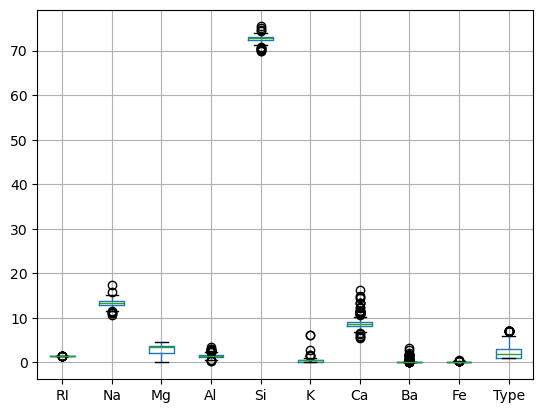

In [14]:
### Checking outliers in the data
df.boxplot()

In [15]:
### outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)
# Each and every column is selected and done outlier capping

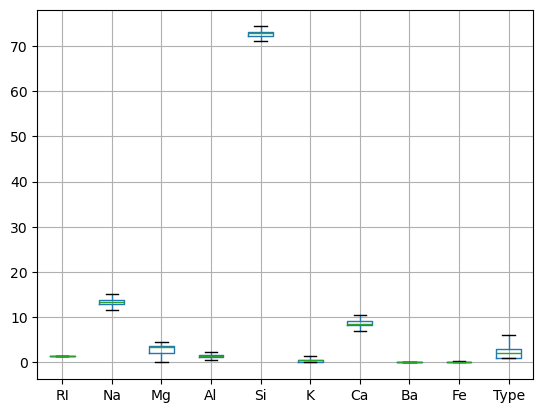

In [16]:
df.boxplot()
plt.show()

### 2) Data Visualization:

##### Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
##### Analyze any patterns or correlations observed in the data.

<Figure size 1700x1000 with 0 Axes>

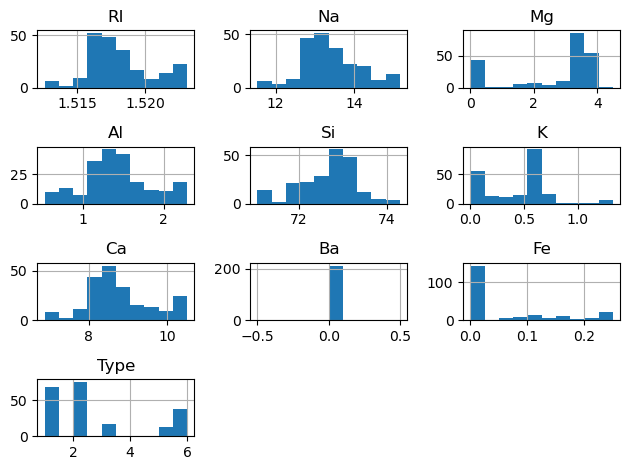

In [27]:
### histogram
plt.figure(figsize=(17,10))
df.hist()
plt.tight_layout()
plt.show()

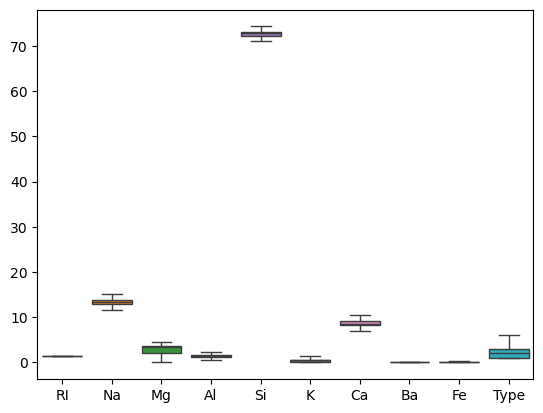

In [28]:
### boxplot
sns.boxplot(data=df)
plt.show()

<Figure size 3000x2000 with 0 Axes>

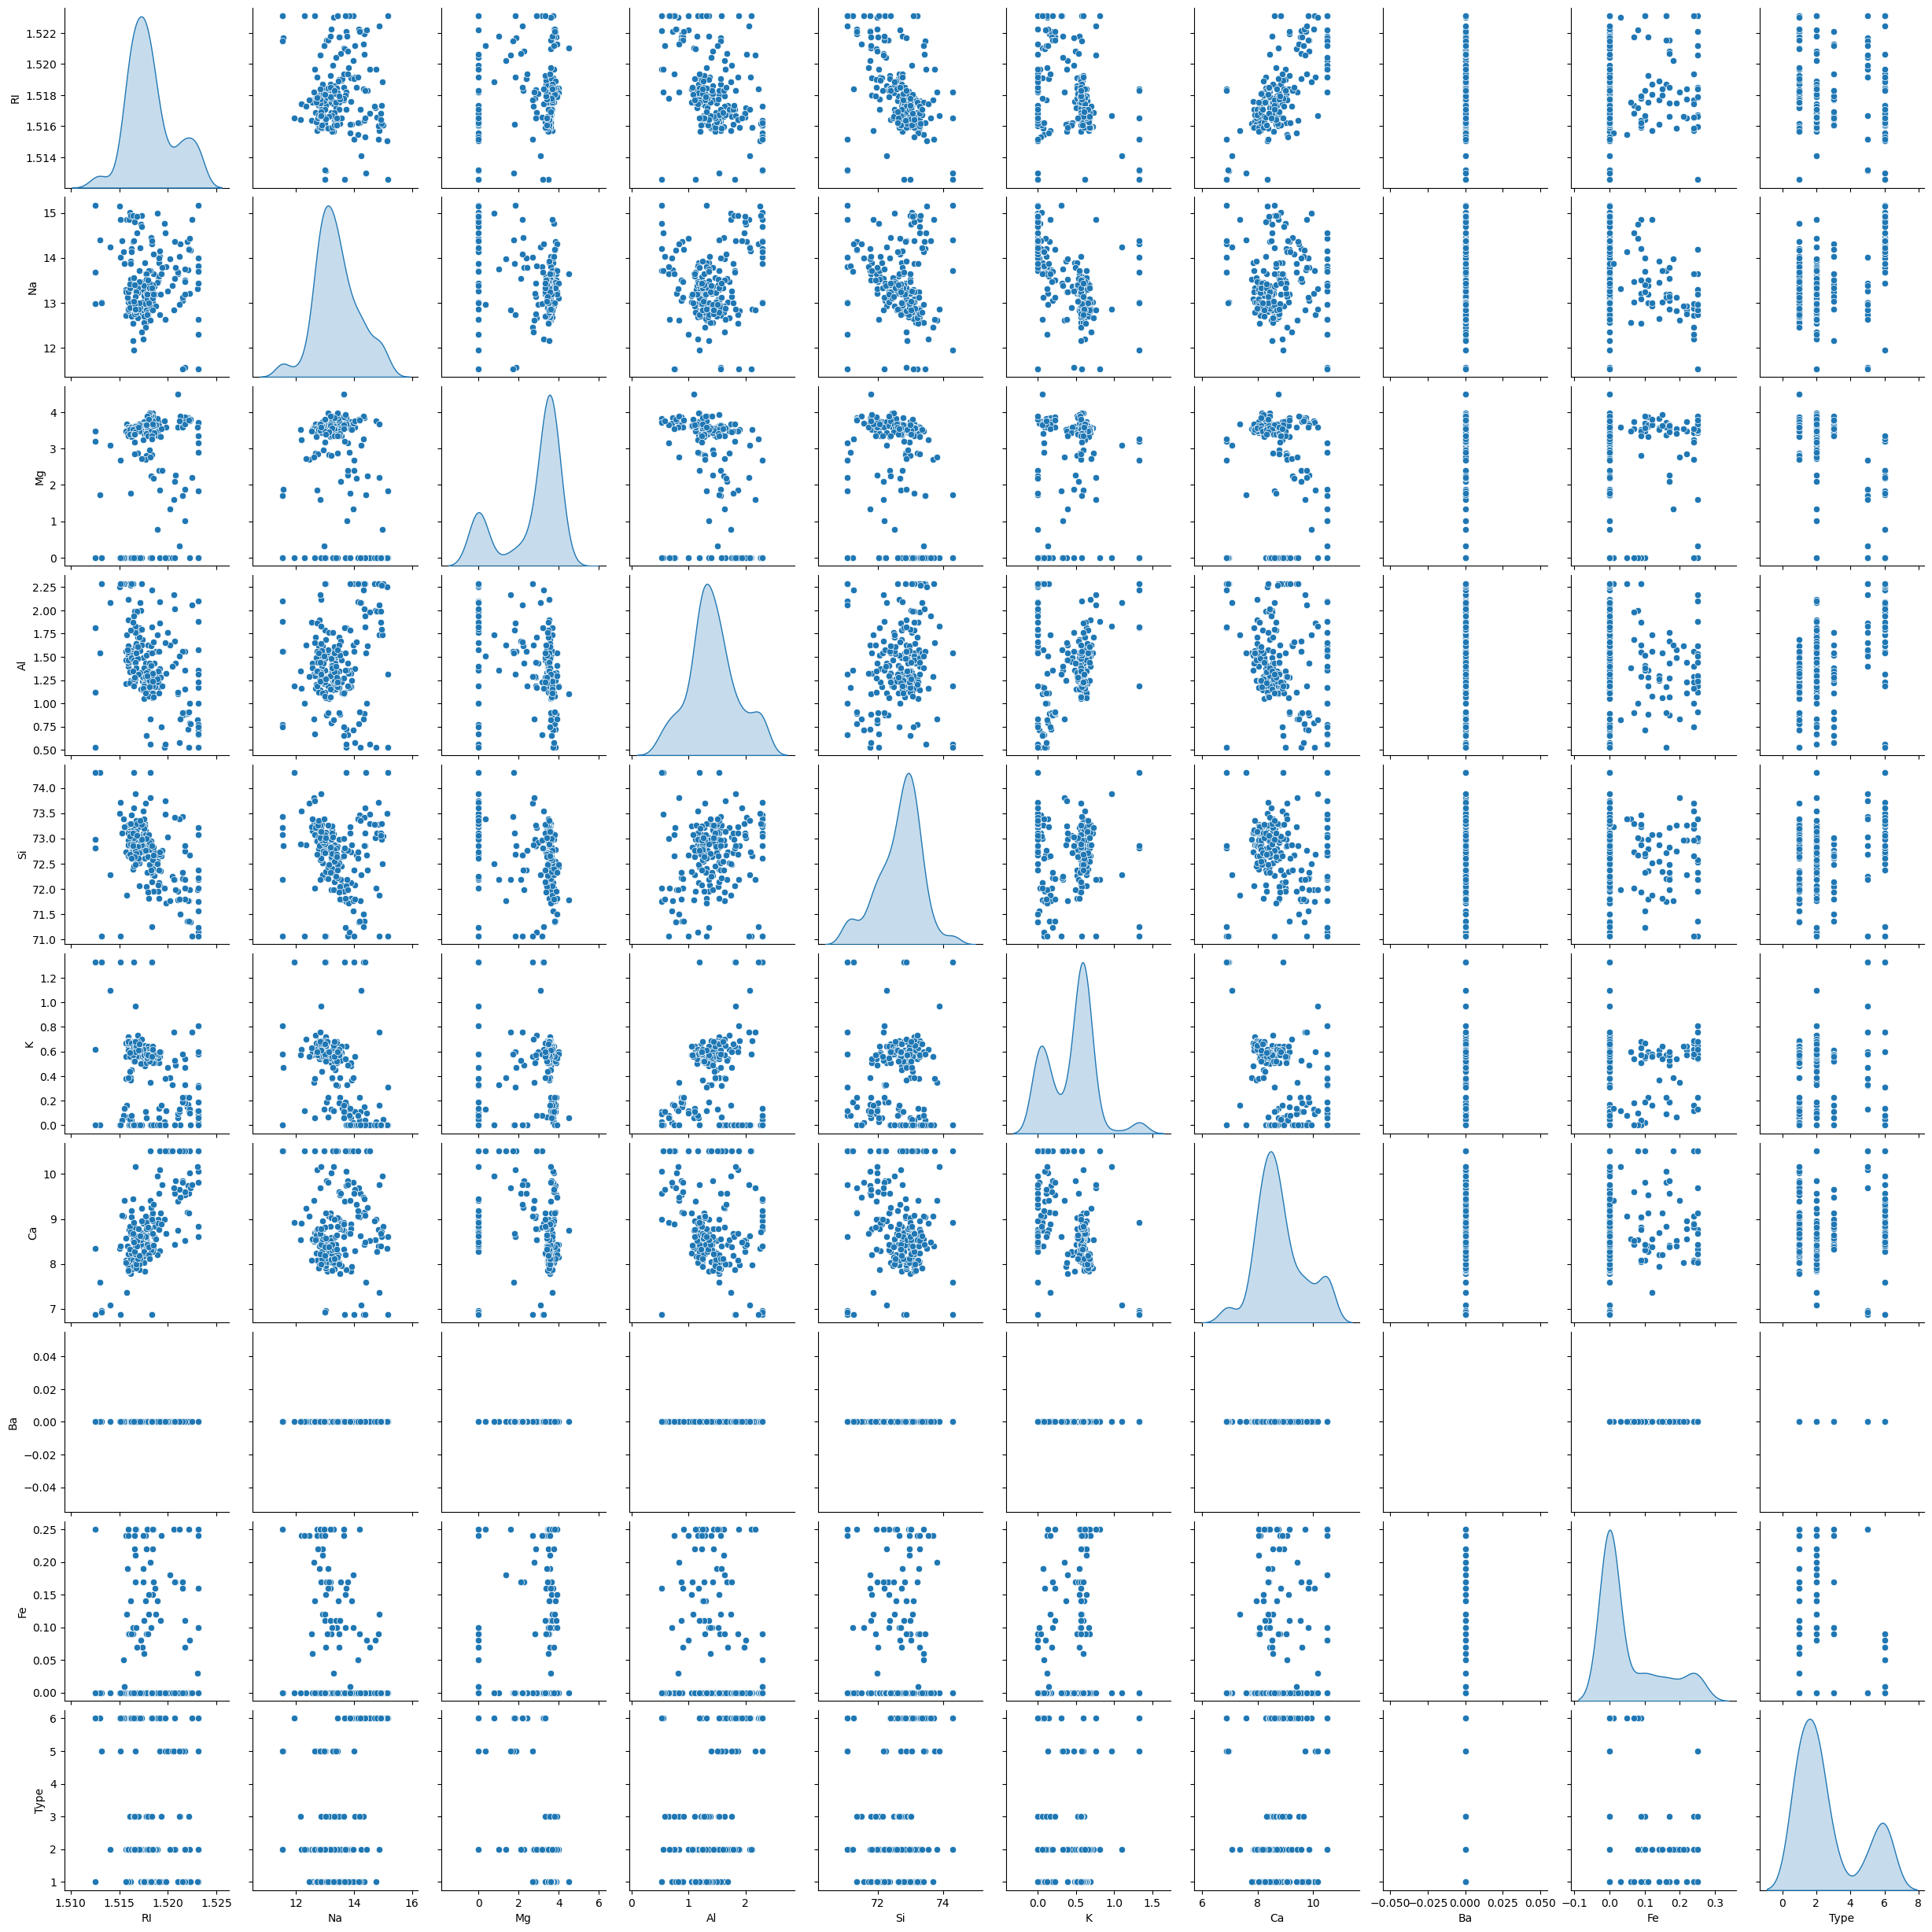

In [29]:
### pairplot
plt.figure(figsize=(30,20))
sns.pairplot(data=df,diag_kind='kde')
plt.show()

In [30]:
### Analyzing the correlation between the features

In [31]:
corr=df.corr()

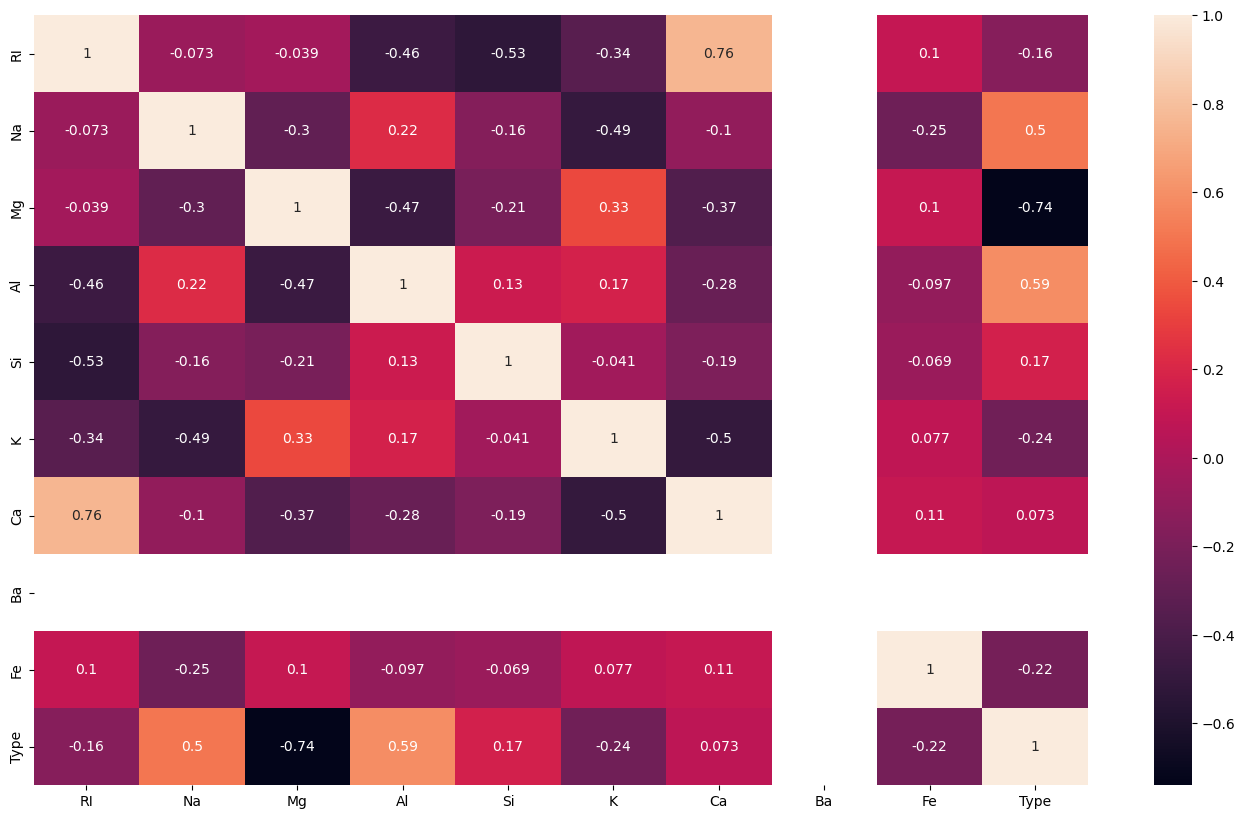

In [33]:
plt.figure(figsize=(17,10))
sns.heatmap(corr,annot=True)
plt.show()

In [34]:
### Most of the features have very low correlation with every other features, so we need not need to remove any features

In [36]:
target=df[['Type']]
features=df.drop(columns=['Type'])

In [35]:
from sklearn.feature_selection import f_classif

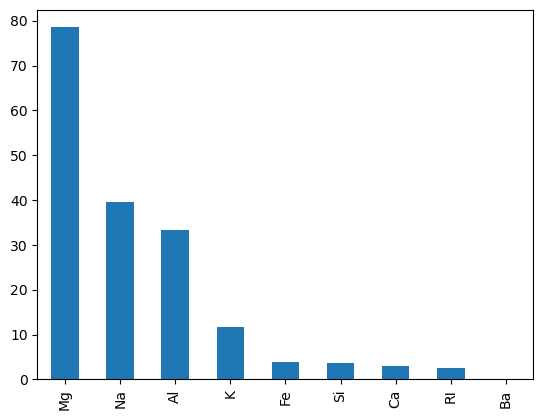

In [37]:
f_class=f_classif(features,target)
pd.Series(f_class[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [38]:
features.drop(columns=['Ba'],inplace=True)

In [39]:
features.head()

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0


In [40]:
target.head()

,Type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


### 3) Data Preprocessing

##### 1) Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

In [46]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [42]:
### There are no missing values, so no need to do any imputation or deletion

##### 2) If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

In [44]:
features.dtypes

RI    float64
Na    float64
Mg    float64
Al    float64
Si    float64
K     float64
Ca    float64
Fe    float64
dtype: object

In [45]:
### There are no categorical variables, so no need to do any encoding. ALl the features and target are already in numerical form

##### 3) Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [47]:
std_sca=StandardScaler()

In [57]:
features[['Na','Mg','Si','Ca']]=std_sca.fit_transform(features[['Na','Mg','Si','Ca']])

In [58]:
features.head()

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,1.52101,0.322680,1.257238,1.10,-1.361078,0.06,-0.044419,0.0
1,1.51761,0.660556,0.639311,1.36,0.086641,0.48,-1.115733,0.0
2,1.51618,0.174014,0.604596,1.54,0.482859,0.39,-1.173956,0.0
3,1.51766,-0.258467,0.701798,1.29,-0.096228,0.57,-0.661589,0.0
4,1.51742,-0.177377,0.653197,1.24,0.620012,0.55,-0.836260,0.0


In [60]:
### every columns are now in standardized form. Imbalanced data are properly handled

### 4) Random Forest Model Implementation

##### 1) Divide the data into train and test split.

In [61]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=150,stratify=target)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(149, 8)
(64, 8)
(149, 1)
(64, 1)


##### 2) Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [63]:
rand_for=RandomForestClassifier(n_estimators=150,bootstrap=True,max_features='sqrt',max_samples=0.9,random_state=50)

##### 3) Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [69]:
rand_for.fit(x_train,y_train)
y_pred=rand_for.predict(x_test)
accuracy_score(y_test,y_pred)

0.75

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.76      0.90      0.83        21
         2.0       0.88      0.65      0.75        23
         3.0       0.40      0.40      0.40         5
         5.0       0.40      0.50      0.44         4
         6.0       0.83      0.91      0.87        11

    accuracy                           0.75        64
   macro avg       0.66      0.67      0.66        64
weighted avg       0.77      0.75      0.75        64



### 5) Bagging and Boosting Methods

##### Apply the Bagging and Boosting methods and compare the results.

##### Bagging

In [75]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [76]:
bag_class=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=200,bootstrap=True,max_features=0.9,bootstrap_features=True,
                           max_samples=0.8,random_state=50)

In [78]:
bag_class.fit(x_train,y_train)
y_pred1=bag_class.predict(x_test)
accuracy_score(y_test,y_pred)

0.765625

In [80]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         1.0       0.80      0.95      0.87        21
         2.0       0.84      0.70      0.76        23
         3.0       0.33      0.20      0.25         5
         5.0       0.50      0.50      0.50         4
         6.0       0.77      0.91      0.83        11

    accuracy                           0.77        64
   macro avg       0.65      0.65      0.64        64
weighted avg       0.75      0.77      0.75        64



##### Boosting

##### Adaboost

In [86]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,XG
from sklearn.linear_model import LogisticRegression

In [83]:
ada_boost=AdaBoostClassifier(estimator=LogisticRegression(),n_estimators=100)

In [84]:
ada_boost.fit(x_train,y_train)
y_pred_ada=ada_boost.predict(x_test)
accuracy_score(y_pred_ada,y_test)

0.59375

In [93]:
print(classification_report(y_pred_ada,y_test))

              precision    recall  f1-score   support

         1.0       0.62      0.65      0.63        20
         2.0       0.65      0.58      0.61        26
         3.0       0.00      0.00      0.00         3
         5.0       0.50      0.50      0.50         4
         6.0       0.73      0.73      0.73        11

    accuracy                           0.59        64
   macro avg       0.50      0.49      0.49        64
weighted avg       0.61      0.59      0.60        64



##### Gradient Boost

In [87]:
grad_boost=GradientBoostingClassifier(n_estimators=100,learning_rate=0.5,subsample=1.0,max_features=1,random_state=50)

In [88]:
grad_boost.fit(x_train,y_train)
y_pred_grad=grad_boost.predict(x_test)
accuracy_score(y_pred_grad,y_test)

0.8125

In [95]:
print(classification_report(y_pred_grad,y_test))

              precision    recall  f1-score   support

         1.0       0.95      0.77      0.85        26
         2.0       0.78      0.90      0.84        20
         3.0       0.40      0.50      0.44         4
         5.0       0.50      0.67      0.57         3
         6.0       0.91      0.91      0.91        11

    accuracy                           0.81        64
   macro avg       0.71      0.75      0.72        64
weighted avg       0.84      0.81      0.82        64



### Additional Notes:

##### 1) Explain Bagging and Boosting methods. How is it different from each other.

##### 2) Explain how to handle imbalance in the data.